## Here we do the timing analysis for the results of `core_study.py`. We want to determine the number of cpu cores we should use to run our simulations.

In [1]:
import os
import pickle
import matplotlib.pyplot as plt

In [2]:
def get_colors(num_colors):

    cmap_viridis = plt.cm.get_cmap('viridis')
    colors = [cmap_viridis(i / num_colors) for i in range(num_colors)]

    return colors

def load_results(filename):
    
    results = pickle.load(open(filename,"rb"))
    cores = results[0]
    times = results[1]

    return cores, times

In [3]:
filename = "core_study_60.pkl"
cores_60, times_60 = load_results(filename)
# times_60 = times_60[:6]
# filename = "core_study_60_round2.pkl"
# _, temp_times = load_results(filename)
# times_60.extend(temp_times)

filename = "core_study_80.pkl"
cores_80, times_80 = load_results(filename)

In [4]:
#results_60 = [cores_60, times_60]

In [5]:
#pickle.dump(results_60,open("core_study_60.pkl","wb"))

/tmp/ipykernel_17734/1025555713.py:3: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap_viridis = plt.cm.get_cmap('viridis')


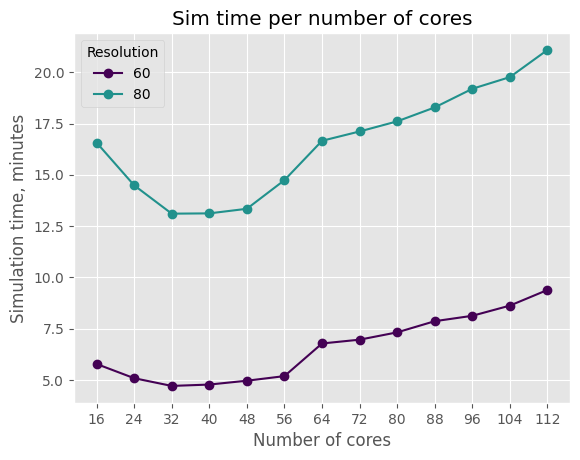

In [6]:
colors = get_colors(2)

plt.style.use("ggplot")

fig, ax = plt.subplots()

ax.plot(cores_60, times_60, marker='o', color=colors[0], label="60")
ax.plot(cores_80, times_80, marker='o', color=colors[1], label="80")
ax.set_ylabel("Simulation time, minutes")
ax.set_xlabel("Number of cores")
ax.set_xticks(cores_60)
ax.set_xticklabels([f'{core}' for core in cores_60])

ax.set_title(f"Sim time per number of cores")
ax.legend(title="Resolution")

### For both resolution=60 and resolution=80, the fastest sim time is with 32 cores.